In [189]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [191]:
data = pd.read_csv('/content/gdrive/My Drive/data_analysis/data/Data_Projects.csv', sep=';', thousands=',')
data

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,416104363472785,535762483130904,1125,749966084023684,1
1,17,37,258,20,211678832116788,430656934306569,157,228903242434015,0
2,78,56,1956,185,349475383373688,476594027441485,1195,142337651183958,1
3,14,70,378,19,318718381112985,463743676222597,206,339656608856838,0
4,111,90,4089,90,55617545209696,490573297422085,2934,157651415402623,1
...,...,...,...,...,...,...,...,...,...
74,2535,12436,44597,113,364709871447105,388518693242128,11172,190810811023819,0
75,1103,12805,33388,411,415795209054238,549773452883935,13911,264220016520197,0
76,3132,20609,75303,409,308070739549839,470916398713826,23982,227816291706146,0
77,5740,47912,167155,1457,427646303638987,595409324501907,61127,989412138569643,0


**1. Рассчитайте основные статистики (меры центра и меры разброса) по распределениям всех переменных, имеющихся в файле данных.**

Часть 1. Основные статистики по всем переменным файла данных:

Рассчитаны – 1 балл

Не рассчитаны – 0 баллов

In [192]:
print('Основные статистики')
print('count - количество')
print('mean - среднее или мат.ожидание')
print('std - стандартное отклонение')
print('далее min, 25-квантиль, медиана, 75-квантиль, max')
data[data.columns[:-1]].describe()

Основные статистики
count - количество
mean - среднее или мат.ожидание
std - стандартное отклонение
далее min, 25-квантиль, медиана, 75-квантиль, max


,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance
count,79.000000,79.000000,79.000000,79.000000,7.900000e+01,7.900000e+01,79.000000,7.900000e+01
mean,1048.037975,3648.683544,21826.012658,305.088608,3.240302e+14,4.030029e+14,9753.126582,3.590153e+14
std,1642.066119,8124.105402,32474.959513,382.052090,1.450942e+14,1.916158e+14,13927.295721,2.567071e+14
min,9.000000,20.000000,258.000000,14.000000,2.226956e+13,9.000000e+00,157.000000,1.437306e+13
25%,81.000000,346.000000,2055.000000,71.500000,2.474869e+14,2.806404e+14,1167.500000,1.743981e+14
50%,371.000000,931.000000,6921.000000,185.000000,3.187184e+14,4.497314e+14,2934.000000,2.780962e+14
75%,1195.000000,2457.500000,30625.500000,402.500000,4.159498e+14,5.427680e+14,13265.000000,4.306599e+14
max,9552.000000,48497.000000,167155.000000,2379.000000,9.291667e+14,7.053151e+14,61127.000000,9.894121e+14


In [193]:
data.nunique()

AddressCount    77
CallsCount      79
ClicksCount     79
FirmsCount      76
GeoPart         79
MobilePart      79
UsersCount      79
Distance        79
IsGeo            2
dtype: int64

Практически все значения признаков уникальны, поэтому считать моду нет смысла. Межквартильный размах хорошо видно по 25 и 75 квантилям.

**2. Выберите наиболее интересный для вас количественный признак и охарактеризуйте его распределение при помощи соответствующих описательных статистик и графиков:**

2.1. Какова форма распределения признака?

2.2. Можно ли говорить о том, что распределение признака согласуется с каким-либо теоретическим законом распределения?

2.3. Есть ли в данных «аномалии» / «выбросы»?

2.4. Какие меры центра и вариативности подходят для описания распределений лучше всего? Почему?

При выполнении этой части задания помните, что применимые меры центра и вариативности, а также графики, которые хорошо иллюстрируют распределения, зависят от типа шкалы измерения признака, а также от особенностей / формы распределения.

Часть 2. Описание распределения признака

2.1. Есть описание и графическая иллюстрация формы распределения признака

2 – есть и то и другое, описание корректно

1 – отсутствует статистическое или графическое описание, описание распределения в целом корректно

0 – описание распределения отсутствует или некорректно.

2.2. Есть вывод о соответствии распределения какому-либо теоретическому закону

1 – есть корректный обоснованный вывод

0 – нет вывода о соответствии распределения какому-либо теоретическому закону, или вывод есть, но некорректный.

2.3. Описаны ли аномалии и выбросы в данных?

1 – да, аномалии / выбросы описаны

0 – описание аномалий в данных / выбросов отсутствует или ошибочно

2.4. Описаны наиболее адекватные меры вариативности, обоснован выбор мер

2 – меры описаны и обоснованы

1 – меры описаны, но не обоснованы (или в обосновании выбора мер есть ошибки)

0 – описание наиболее адекватных мер центра и вариативности отсутствует или ошибочно.

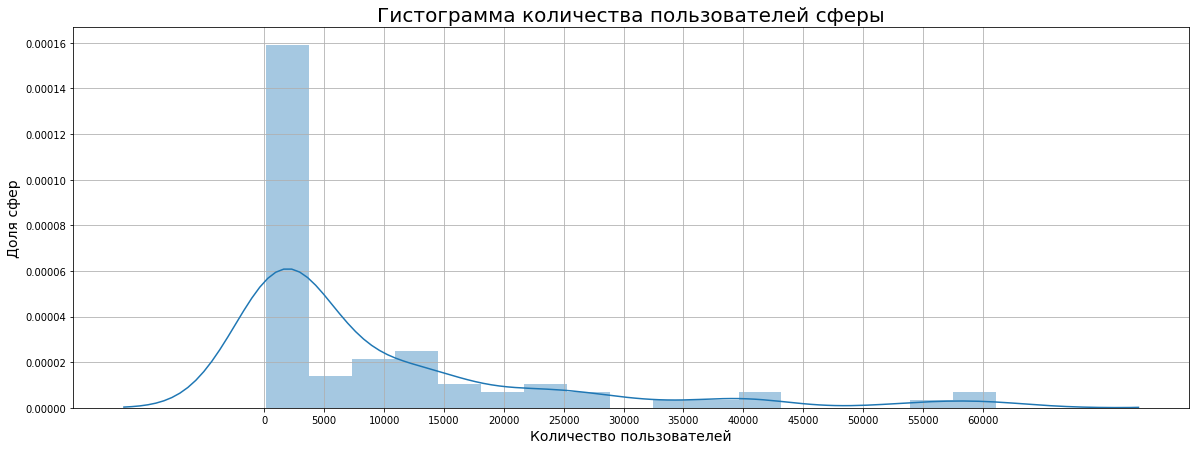

In [194]:
plt.figure(figsize=(20, 7))
sns.distplot(data['UsersCount'], bins=17, kde=True)
# plt.hist(x='UsersCount', bins=17, density=1, data=data, alpha=1)
plt.title('Гистограмма количества пользователей сферы', fontsize=20)
plt.ylabel('Доля сфер', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=14)
plt.xticks(range(0, 63000, 5000))
plt.grid(True)

In [0]:
data['logUsersCount'] = np.log(data['UsersCount'])

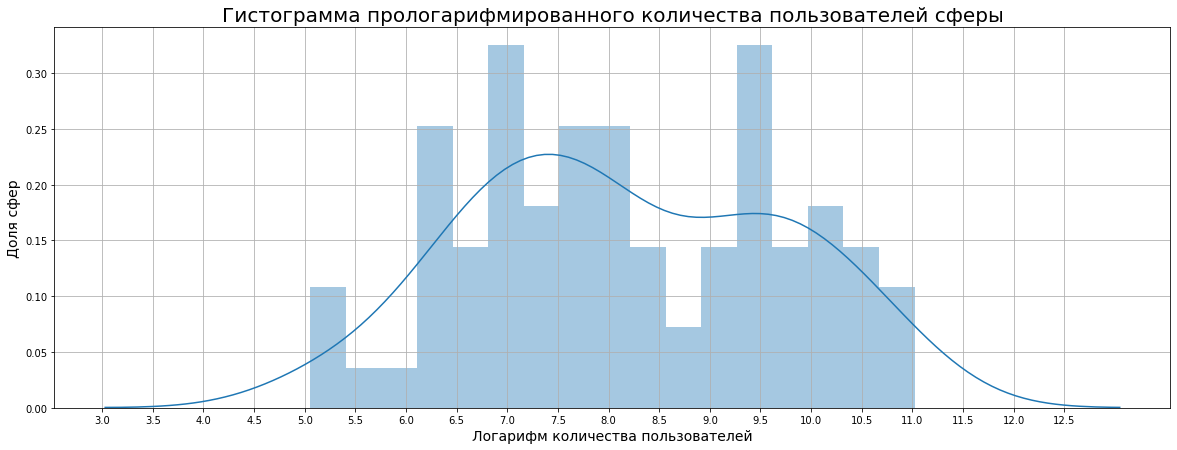

In [219]:
plt.figure(figsize=(20, 7))
sns.distplot(data['logUsersCount'], bins=17, kde=True)
plt.title('Гистограмма прологарифмированного количества пользователей сферы', fontsize=20)
plt.ylabel('Доля сфер', fontsize=14)
plt.xlabel('Логарифм количества пользователей', fontsize=14)
plt.xticks([x/100 for x in range(300, 1300, 50)])
plt.grid(True)

Лучше всего при построении гистограммы получилось подобрать количество интервалов вручную, остальные методы показывали хуже. Распределение сильно скошено влево, большая часть показателей распределено от 0 до 4000. Возможно есть аномалии/выбросы - значения выше 45000 или даже выше 30000. Также в данных возможно имеется смесь двух распределений: до 30000 и после. Распределение визуально похоже на логнормальное, экспоненциальное или пуассоновское. Прологарифмировав значения и построив гистограмму мы получили два пика, что еще раз подтверждает наличие смеси в распределении. Из-за наличия выбросов оптимальной мерой центра описывающей данное распределение является медиана, а волатильность покажут межквартильный размах и медианное абсолютное отклонение. Их значения рассчитаны ниже.

In [195]:
print('Меры центра')
print('Медиана =', data['UsersCount'].median())
print('Меры волатильности')
print('Межквартильный размах =', data['UsersCount'].quantile(0.75) - data['UsersCount'].quantile(0.25))
print('Медианное абсолютное отклонение =', round(sum(abs(data['UsersCount'] - data['UsersCount'].median()))/len(data['UsersCount']), 2))

Меры центра
Медиана = 2934.0
Меры волатильности
Межквартильный размах = 12097.5
Медианное абсолютное отклонение = 8500.11


Сравним лямбду полученную из матожидания и дисперсии между собой. Это переменная экспоненциального распределения.

In [196]:
print(round(1/data['UsersCount'].mean(), 7), round(math.sqrt(1/data['UsersCount'].var()), 7))
print(round(1/data[data['UsersCount'] < 60000]['UsersCount'].mean(), 7), round(math.sqrt(1/data[data['UsersCount'] < 60000]['UsersCount'].var()), 7))
print(round(1/data[data['UsersCount'] < 45000]['UsersCount'].mean(), 7), round(math.sqrt(1/data[data['UsersCount'] < 45000]['UsersCount'].var()), 7))
print(round(1/data[data['UsersCount'] < 30000]['UsersCount'].mean(), 7), round(math.sqrt(1/data[data['UsersCount'] < 30000]['UsersCount'].var()), 7))

0.0001025 7.18e-05
0.00011 7.86e-05
0.0001273 9.75e-05
0.000162 0.0001334


Из логнормального распределения можно сделать нормальное, если его значения прологарифмировать. По матожиданию и дисперсии прологарифмированного ряда можно получить первоначальные матожидание и дисперсию.

In [0]:
def log_norm_expectation(mu, var):
    return math.exp(mu + var/2)

def log_norm_variance(mu, var):
    return (math.exp(var) -1) * math.exp(2*mu + var)

def print_statistics(df_series):
    mu = df_series.mean()
    var = df_series.var()
    print('Матожидание', log_norm_expectation(mu, var))
    print('Дисперсия', log_norm_variance(mu, var))

In [199]:
print('По всем данным')
print('Матожидание LN', data['UsersCount'].mean())
print('Дисперсия LN', data['UsersCount'].var())
print_statistics(data['logUsersCount'])
print()
print('До 60000')
print('Матожидание LN', data[data['UsersCount'] < 60000]['UsersCount'].mean())
print('Дисперсия LN', data[data['UsersCount'] < 60000]['UsersCount'].var())
print_statistics(data[data['UsersCount'] < 60000]['logUsersCount'])
print()
print('До 45000')
print('Матожидание LN', data[data['UsersCount'] < 45000]['UsersCount'].mean())
print('Дисперсия LN', data[data['UsersCount'] < 45000]['UsersCount'].var())
print_statistics(data[data['UsersCount'] < 45000]['logUsersCount'])
print()
print('До 30000')
print('Матожидание LN', data[data['UsersCount'] < 30000]['UsersCount'].mean())
print('Дисперсия LN', data[data['UsersCount'] < 30000]['UsersCount'].var())
print_statistics(data[data['UsersCount'] < 30000]['logUsersCount'])
print()

По всем данным
Матожидание LN 9753.12658227848
Дисперсия LN 193969566.0863356
Матожидание 11415.718650905746
Дисперсия 1216274754.202426

До 60000
Матожидание LN 9094.48717948718
Дисперсия LN 161772914.64269063
Матожидание 10595.368910811616
Дисперсия 962658072.8889471

До 45000
Матожидание LN 7854.223684210527
Дисперсия LN 105174492.4959649
Матожидание 9113.690947308647
Дисперсия 598714039.4474837

До 30000
Матожидание LN 6174.458333333333
Дисперсия LN 56156524.73063381
Матожидание 7017.54037373914
Дисперсия 266418345.0542492



В распределении Пуассона матожидание и дисперсия равны. Как видно из предыдущих расчетов это не так. Следовательно больше всего распредление похоже на теоретическое экспоненциальное распредление при условии, что значения выше 30000 являются выбросами.

In [200]:
data[data['UsersCount'] > 30000]

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo,logUsersCount
10,9552,207,101558,1473,38350698470322,705315091276917,54098,813439315154229,1,10.898552
61,3864,2858,64645,558,417709198813056,584795252225519,38955,922085394259457,1,10.570162
67,3070,6390,75789,740,360113981200503,664948930501073,40147,166151688251154,1,10.600303
72,4121,10019,94918,797,324555572840798,562467295535222,40614,227631335761423,1,10.611868
73,3521,12189,66822,205,211047848461623,655352385123545,32644,335611048392976,1,10.393416
77,5740,47912,167155,1457,427646303638987,595409324501907,61127,989412138569643,0,11.020709
78,6037,48497,149920,1157,431926384765025,524849834476639,58351,918713971923729,1,10.974232


In [201]:
print('Статистики на данных без выбросов')
print('Матожидание', data[data['UsersCount'] < 30000]['UsersCount'].mean())
print('Стандартное отклонение', data[data['UsersCount'] < 30000]['UsersCount'].std())
print('Первая квартиль', data[data['UsersCount'] < 30000]['UsersCount'].quantile(0.25))
print('Вторая квартиль = медиана', data[data['UsersCount'] < 30000]['UsersCount'].quantile(0.5))
print('Третья квартиль', data[data['UsersCount'] < 30000]['UsersCount'].quantile(0.75))


Статистики на данных без выбросов
Матожидание 6174.458333333333
Стандартное отклонение 7493.765724296017
Первая квартиль 1128.75
Вторая квартиль = медиана 2519.0
Третья квартиль 9621.5


**3. Сравните геозависимые и геонезависимые сферы (экспертная разметка, переменная IsGeo) по выбранному для анализа признаку. Есть ли отличия? В чем они состоят? (для ответа на вопрос используйте статистические и графические инструменты).**

При выполнении этой части задания, учтите, пожалуйста, что важно представить все три компонента сравнения: цифры (соответствующие меры центра и разброса), график, иллюстрирующий различия, а также содержательный комментарий: как именно различаются сферы по выбранному признаку.

Часть 3. Сравнение геозависимых и геонезависимых сфер. Сравнение сделано на основе статистик, графиков, содержательного описания различий.

3 балла – полный корректный ответ: есть содержательное, статистическое и графическое сравнение.

2 балла – частичный в целом корректный ответ: есть статистики и графики, но нет описания к ним, или описание содержит ошибки; есть статистики и их описание, но нет графика; есть графики и описание, но нет «подкрепления» статистиками (цифрами).

1 балл – неполный / частично некорректный ответ: есть ошибки в описании различий, отсутствуют два из трех способов сравнения (статистики, графики, содержательное описание)

Максимальный балл: 10 баллов

Граница для успешного прохождения: 6 баллов

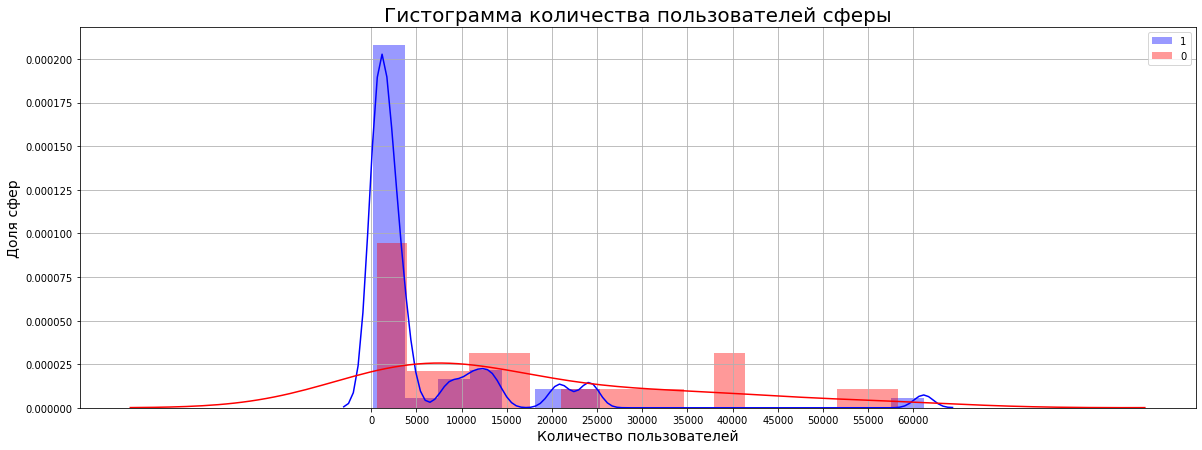

In [202]:
plt.figure(figsize=(20, 7))
sns.distplot(data[data['IsGeo'] == 0]['UsersCount'], bins=17, kde=True, color='b')
sns.distplot(data[data['IsGeo'] == 1]['UsersCount'], bins=17, kde=True, color='r')
# plt.hist(x='UsersCount', bins=17, density=1, data=data, alpha=1)
plt.title('Гистограмма количества пользователей сферы', fontsize=20)
plt.ylabel('Доля сфер', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=14)
plt.xticks(range(0, 63000, 5000))
plt.legend(data['IsGeo'])
plt.grid(True)

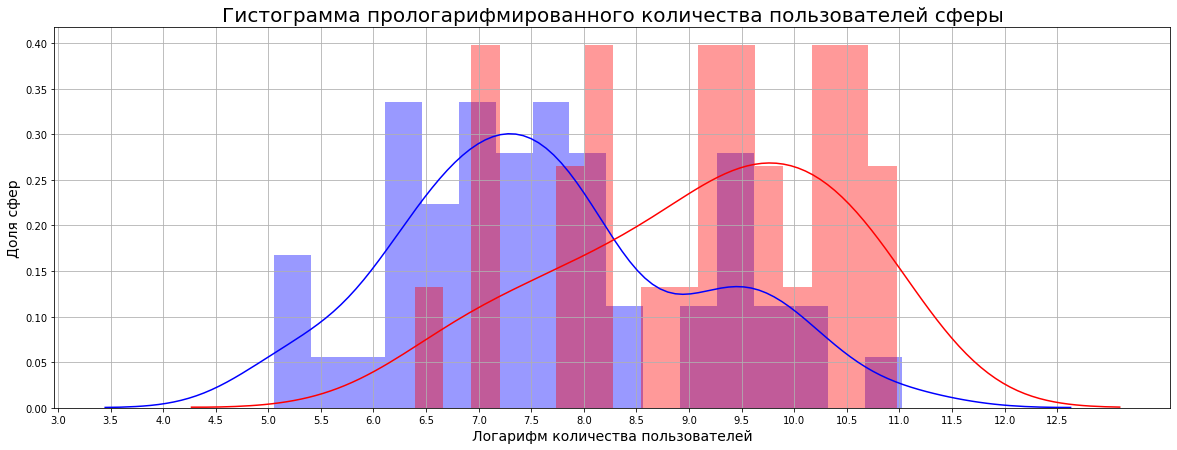

In [215]:
plt.figure(figsize=(20, 7))
sns.distplot(data[data['IsGeo'] == 0]['logUsersCount'], bins=17, kde=True, color='b')
sns.distplot(data[data['IsGeo'] == 1]['logUsersCount'], bins=17, kde=True, color='r')
# plt.hist(x='logUsersCount', bins=13, data=data)
plt.title('Гистограмма прологарифмированного количества пользователей сферы', fontsize=20)
plt.ylabel('Доля сфер', fontsize=14)
plt.xlabel('Логарифм количества пользователей', fontsize=14)
plt.xticks([x/100 for x in range(300, 1300, 50)])
plt.grid(True)

In [211]:
data.groupby('IsGeo')[['UsersCount', 'logUsersCount']].describe()

UsersCount                              ... logUsersCount                      
           count          mean           std  ...           50%        75%        max
IsGeo                                         ...                                    
0           51.0   5666.470588  10178.260318  ...      7.507141   8.256726  11.020709
1           28.0  17196.678571  16718.427766  ...      9.426469  10.217572  10.974232

[2 rows x 16 columns]

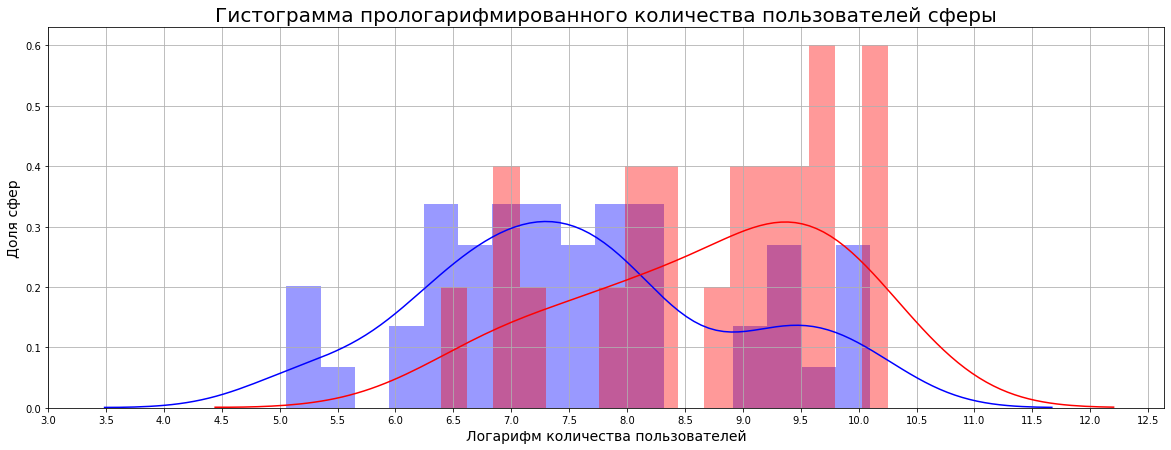

In [214]:
plt.figure(figsize=(20, 7))
sns.distplot(data[data['IsGeo'] == 0][data['UsersCount'] < 30000]['logUsersCount'], bins=17, kde=True, color='b')
sns.distplot(data[data['IsGeo'] == 1][data['UsersCount'] < 30000]['logUsersCount'], bins=17, kde=True, color='r')
# plt.hist(x='logUsersCount', bins=13, data=data)
plt.title('Гистограмма прологарифмированного количества пользователей сферы', fontsize=20)
plt.ylabel('Доля сфер', fontsize=14)
plt.xlabel('Логарифм количества пользователей', fontsize=14)
plt.xticks([x/100 for x in range(300, 1300, 50)])
plt.grid(True)

In [213]:
data[data['UsersCount'] < 30000].groupby('IsGeo')[['UsersCount', 'logUsersCount']].describe()

UsersCount                            ... logUsersCount                     
           count         mean          std  ...           50%       75%        max
IsGeo                                       ...                                   
0           50.0  4557.260000  6456.228484  ...      7.465355  8.202691  10.100000
1           22.0  9849.909091  8498.427490  ...      9.003034  9.587994  10.254074

[2 rows x 16 columns]

Text(0.5, 0, 'IsGeo')

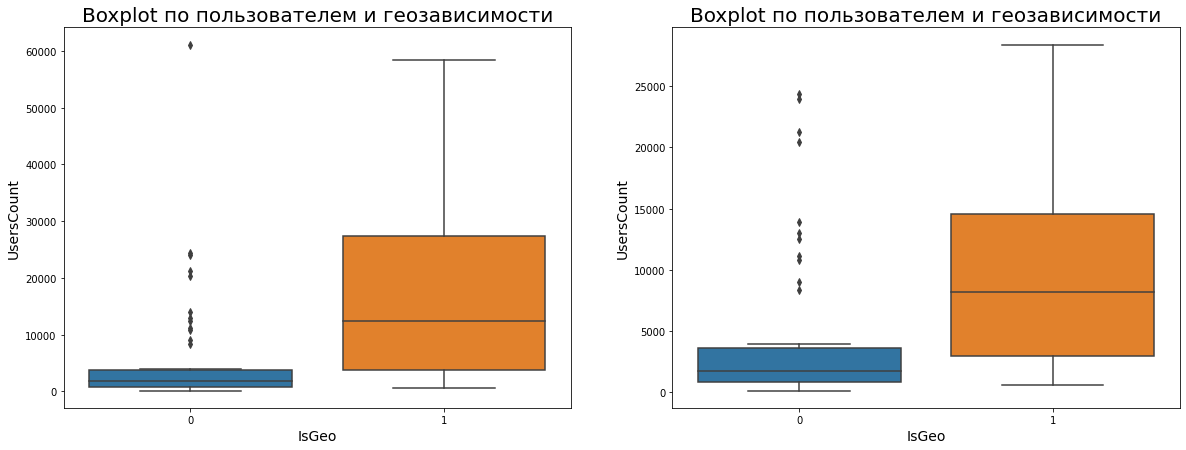

In [229]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
sns.boxplot(x='IsGeo', y='UsersCount', data=data, orient='v')
plt.title('Boxplot по пользователем и геозависимости', fontsize=20)
plt.ylabel('UsersCount', fontsize=14)
plt.xlabel('IsGeo', fontsize=14)

plt.subplot(122)
sns.boxplot(x='IsGeo', y='UsersCount', data=data[data['UsersCount'] < 30000], orient='v')
plt.title('Boxplot по пользователем и геозависимости', fontsize=20)
plt.ylabel('UsersCount', fontsize=14)
plt.xlabel('IsGeo', fontsize=14)


Text(0.5, 0, 'IsGeo')

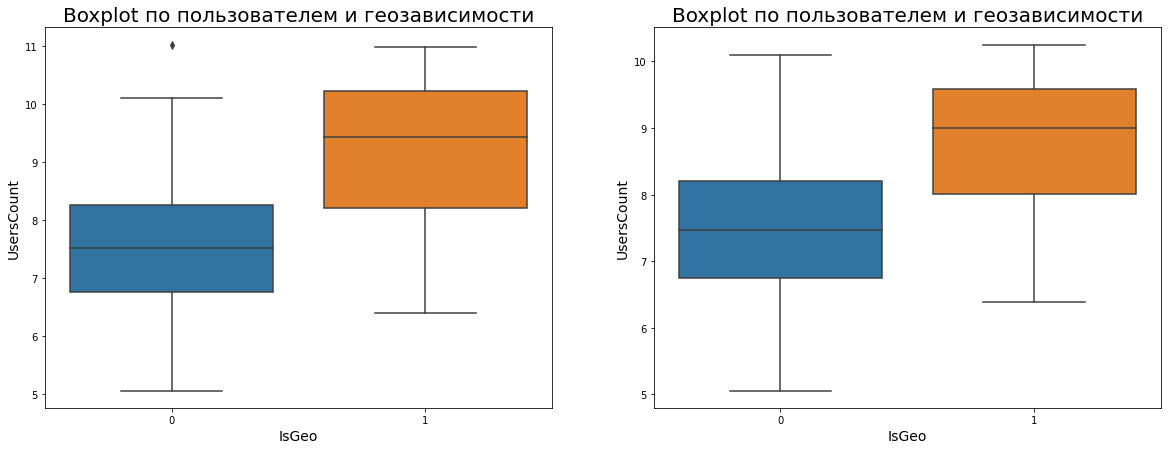

In [230]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
sns.boxplot(x='IsGeo', y='logUsersCount', data=data, orient='v')
plt.title('Boxplot по пользователем и геозависимости', fontsize=20)
plt.ylabel('UsersCount', fontsize=14)
plt.xlabel('IsGeo', fontsize=14)

plt.subplot(122)
sns.boxplot(x='IsGeo', y='logUsersCount', data=data[data['UsersCount'] < 30000], orient='v')
plt.title('Boxplot по пользователем и геозависимости', fontsize=20)
plt.ylabel('UsersCount', fontsize=14)
plt.xlabel('IsGeo', fontsize=14)


Геозависимые сферы посещают больше пользователей, но иногда и на геонезависимых сферах бывают высокие показатели действий пользователей, но они носят более случайный/аномальный характер. Это подтверждается как графиками, так и расчетами.